# Описание проекта

Компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.  

### Описание данных:  
- *id* - уникальный идентификатор скважины;
- *f0, f1, f2* - три признака точек;
- *product* - объём запасов в скважине (тыс. баррелей).

### Содержание:
- [1. Загрузка и подготовка данных](#step1)
- [2. Обучение и проверка модели](#step2)
- [3. Подготовка к расчёту прибыли](#step3)
- [4. Расчёт прибыли и рисков](#step4)
- [5. Вывод](#step5)

# 1. Загрузка и подготовка данных<a id="step1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
try:
    df_0 = pd.read_csv('geo_data_0.csv')
    df_1 = pd.read_csv('geo_data_1.csv')
    df_2 = pd.read_csv('geo_data_2.csv')
except:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


**Оценим общие сведение датасетов регионов**

In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Оценим распределение признаков по регионам**

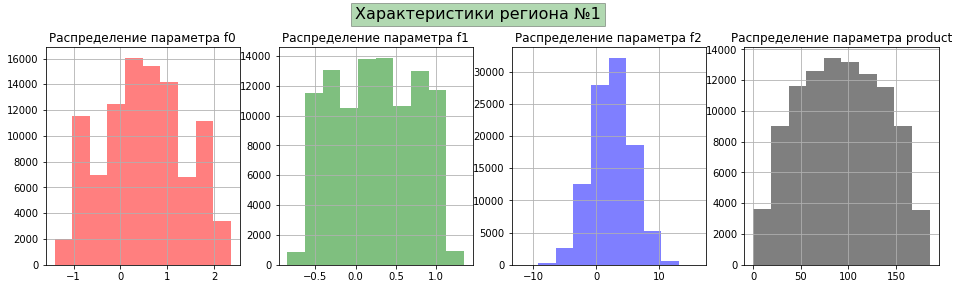

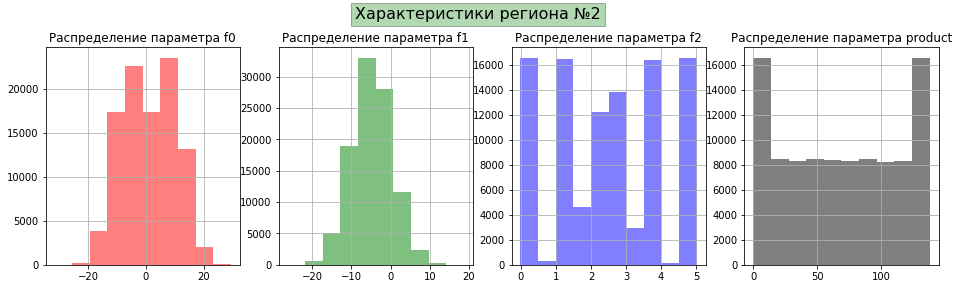

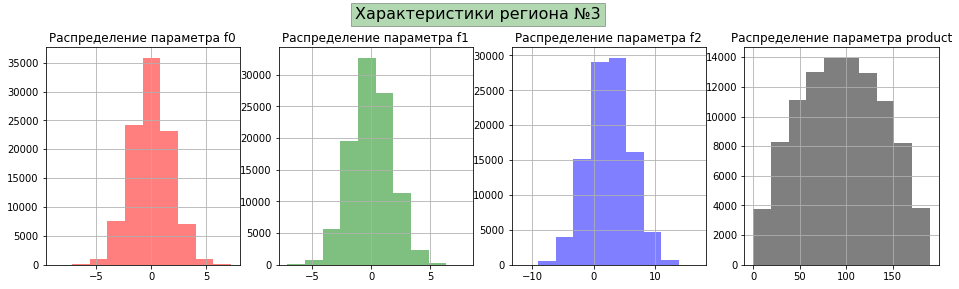

In [7]:
colors = ['red', 'green', 'blue', 'black']

for i, df in enumerate([df_0, df_1, df_2]):
    fig = plt.figure(figsize=(16, 4))
    fig.suptitle('Характеристики региона №{}'.format(i+1), y=1.02, fontsize=16,
                 bbox=dict(edgecolor='black', facecolor='green', alpha=0.3))
    cols = df.drop('id', axis=1).columns
    for j, (color, col) in enumerate(zip(colors, cols)):
        ax = fig.add_subplot(1, len(cols), j+1)
        ax.hist(df[col], color=color, alpha=0.5)
        ax.grid(True)
        ax.set_title('Распределение параметра {}'.format(col))

plt.show()

**Вывод: аномальных данных не наблюдается**

# 2. Обучение и проверка модели<a id="step2"></a>

## Исследование региона №1

In [8]:
features_0 = df_0.drop(['id', 'product'], axis=1)
target_0 = df_0['product']

In [9]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=42)

In [10]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predicted_0 = model_0.predict(features_valid_0)
rmse_0 = mean_squared_error(target_valid_0, predicted_0) ** 0.5

**Средний запас предсказанного сырья региона №1**

In [11]:
predicted_0.mean()

92.39879990657768

**RMSE региона №1**

In [12]:
rmse_0

37.75660035026169

## Исследование региона №2

In [13]:
features_1 = df_1.drop(['id', 'product'], axis=1)
target_1 = df_1['product']

In [14]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=42)

In [15]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predicted_1 = model_1.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1, predicted_1) ** 0.5

**Средний запас предсказанного сырья региона №2**

In [16]:
predicted_1.mean()

68.71287803913764

**RMSE региона №2**

In [17]:
rmse_1

0.8902801001028828

## Исследование региона №3

In [18]:
features_2 = df_2.drop(['id', 'product'], axis=1)
target_2 = df_2['product']

In [19]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=42)

In [20]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predicted_2 = model_2.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2, predicted_2) ** 0.5

**Средний запас предсказанного сырья региона №3**

In [21]:
predicted_2.mean()

94.77102387765939

**RMSE региона №3**

In [22]:
rmse_2

40.145872311342174

**Сводная таблица**

In [23]:
data = {
    'Регион №1': [predicted_0.mean(), rmse_0],
    'Регион №2': [predicted_1.mean(), rmse_1],
    'Регион №3': [predicted_2.mean(), rmse_2]
}
pd.DataFrame(data, index=['Средний запас предсказанного сырья', 'RMSE'])

,Регион №1,Регион №2,Регион №3
Средний запас предсказанного сырья,92.3988,68.712878,94.771024
RMSE,37.7566,0.890280,40.145872


**Вывод:**  
_Наибольшим средним предсказанным запасом обладает регион №3, однако модель обладает наименьшей точностью предсказания, и напротив, регион №2 обладает наименьшим средним предсказанным запасом, однако точность предсказания модели на 2 порядка выше, чем у остальных регионов_

# 3. Подготовка к расчёту прибыли<a id="step3"></a>

In [24]:
# бюджет
budget = 10_000_000_000
# доход от добычи 1000 баррелей
profit_per_barrel = 450_000
# количество скавиж для разработки в регионе
wells_to_drill = 200
# количество скважин для бутстрепа
wells_to_check = 500
# уровень вероятности для расчета доверительного интервала
prob = 0.95

In [25]:
# достаточный объем для безубыточной разработки скважины
decent_vol_per_well = budget / wells_to_drill / profit_per_barrel
print(decent_vol_per_well)

111.11111111111111


In [26]:
for ix, target in enumerate([target_0, target_1, target_2]):
    print('Средние запасы сырья по региону №{}: {}'.format(ix + 1, target.mean()))

Средние запасы сырья по региону №1: 92.50000000000001
Средние запасы сырья по региону №2: 68.82500000000002
Средние запасы сырья по региону №3: 95.00000000000004


**Вывод:**  
_Средние запасы сырья на скважину по всем регионам меньше, чем достаточный объем сырья для безубыточной разработки скважины. Можно заметить, что средние значения запасов по предсказаниям практически идентичны средним реальных запасов сырья_

_**Функция get_profit создана для расчета прибыли по 200 лучшим скважинам в соответствии с предсказаниями модели, принимает на вход target (реальные запасы сырья) и prediction (запасы сырья, предсказанные моделью), возвращает profit (прибыль)**_

In [27]:
def get_profit(target, prediction):
    # сортировка предсказанных запасов сырья по убыванию
    predict_sorted = prediction.sort_values(ascending=False)
    # отбор 200 лучших скважин
    selected = target[predict_sorted.index][:wells_to_drill]
    # вычисления прибыли (доход - бюджет)
    profit = profit_per_barrel * selected.sum() - budget
    return profit

# 4. Расчёт прибыли и рисков<a id="step4"></a>

In [28]:
state = RandomState(42)

_**Функция bootstrap производит процедуру Бутстрап для создания выборки в тысячу элементов возможных вариаций прибыли по региону, принимает на вход target (реальные запасы сырья) и prediction (запасы сырья, предсказанные моделью), возвращает values (возможные значения прибыли по региону)**_

In [29]:
def bootstrap(target, prediction):
    values = []
    target = target.reset_index(drop=True)
    prediction = pd.Series(prediction)
    for i in range(1000):
        target_subsample = target.sample(n=wells_to_check, replace=True, random_state=state)
        pred_subsample = prediction[target_subsample.index]
        profit = get_profit(target_subsample, pred_subsample)
        values.append(profit)
    return pd.Series(values)

_**Функция get_risk оценивает риск убытков по выборке возможных значений прибыли по региону**_

In [30]:
def get_risk(values):
    return sum(values < 0) / len(values)

## 4.1 Исследование региона №1

In [31]:
values_0 = bootstrap(target_valid_0, predicted_0)

**Среднее значение прибыли**

In [32]:
E_0 = values_0.mean()
print('{:,}'.format(int(E_0)))

427,847,560


**Доверительный интервал по уровню 95%**

In [33]:
lower_0 = values_0.quantile((1 - prob) / 2)
upper_0 = values_0.quantile((1 + prob) / 2)
print('({:,}  --  {:,})'.format(int(lower_0), int(upper_0)))

(-97,249,829  --  954,215,192)


**Риск убытков**

In [34]:
risk_0 = get_risk(values_0)
print('{:2.1%}'.format(risk_0))

5.5%


## 4.2 Исследование региона №2

In [35]:
values_1 = bootstrap(target_valid_1, predicted_1)

**Среднее значение прибыли**

In [36]:
E_1 = values_1.mean()
print('{:,}'.format(int(E_1)))

511,530,218


**Доверительный интервал по уровню 95%**

In [37]:
lower_1 = values_1.quantile((1 - prob) / 2)
upper_1 = values_1.quantile((1 + prob) / 2)
print('({:,}  --  {:,})'.format(int(lower_1), int(upper_1)))

(91,700,564  --  921,455,668)


**Риск убытков**

In [38]:
risk_1 = get_risk(values_1)
print('{:2.1%}'.format(risk_1))

0.6%


## 4.3 Исследование региона №3

In [39]:
values_2 = bootstrap(target_valid_2, predicted_2)

**Среднее значение прибыли**

In [40]:
E_2 = values_2.mean()
print('{:,}'.format(int(E_2)))

408,545,681


**Доверительный интервал по уровню 95%**

In [41]:
lower_2 = values_2.quantile((1 - prob) / 2)
upper_2 = values_2.quantile((1 + prob) / 2)
print('({:,}  --  {:,})'.format(int(lower_2), int(upper_2)))

(-120,624,872  --  960,859,440)


**Риск убытков**

In [42]:
risk_2 = get_risk(values_2)
print('{:2.1%}'.format(risk_2))

7.5%


**Сводная таблица результатов**

In [43]:
data = {
    'Регион №1': ['{:,.0f}'.format(E_0), '({:,.0f} - {:,.0f})'.format(lower_0, upper_0), '{:2.1%}'.format(risk_0)],
    'Регион №2': ['{:,.0f}'.format(E_1), '({:,.0f} - {:,.0f})'.format(lower_1, upper_1), '{:2.1%}'.format(risk_1)],
    'Регион №3': ['{:,.0f}'.format(E_2), '({:,.0f} - {:,.0f})'.format(lower_2, upper_2), '{:2.1%}'.format(risk_2)]
}
pd.DataFrame(data, index=['Среднее значение прибыли', 'Доверительный интервал (95%)', 'Риск убытков'])

,Регион №1,Регион №2,Регион №3
Среднее значение прибыли,"427,847,560","511,530,218","408,545,681"
Доверительный интервал (95%),"(-97,249,830 - 954,215,193)","(91,700,564 - 921,455,668)","(-120,624,873 - 960,859,441)"
Риск убытков,5.5%,0.6%,7.5%


# Вывод<a id="step5"></a>
**Самый перспективный регион для разработки месторождений - регион №2, как показал проведенный анализ, данный регион характеризуется самым большим значением возможной средней прибыли, 95% интервал не охватывает отрицательные значения прибыли, а также обладает минимальным риском убытков менее заданного 2,5%**